In [61]:
# Import the necessary libraries related to training the model.
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [62]:
# Read the data from the csv file
col_names = ["id", "age", "sex", "region", "income", "married", "children", "car", "save_act", "current_act", "mortgage", "pep"]
bank = pd.read_csv("bank.csv", header=None, names=col_names, skiprows=[0])

In [63]:
bank.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [64]:
# Convert the categorical data into numerical data
catergorical_columns = ["sex", "married", "car", "save_act", "current_act", "mortgage", "pep"]
bank = pd.get_dummies(bank, columns=catergorical_columns, drop_first=True, prefix=None)
# Convert the non-binary categorical data into numerical data
label_encoder = LabelEncoder()
bank["region"] = label_encoder.fit_transform(bank["region"])

In [65]:
bank.head()

,id,age,region,income,children,sex_MALE,married_YES,car_YES,save_act_YES,current_act_YES,mortgage_YES,pep_YES
0,ID12101,48,0,17546.0,1,False,False,False,False,False,False,True
1,ID12102,40,3,30085.1,3,True,True,True,False,True,True,False
2,ID12103,51,0,16575.4,0,False,True,True,True,True,False,False
3,ID12104,23,3,20375.4,3,False,True,False,False,True,False,False
4,ID12105,57,1,50576.3,0,False,True,False,True,False,False,False


In [66]:
# Spilitting the data, the features columns refers to the independent variables and the label column refers to the dependent variable
# The label column is the column that we are trying to predict
feature_cols = ["age", "region", "sex_MALE", "income", "married_YES", "children", "car_YES", "save_act_YES", "current_act_YES", "mortgage_YES"]
X = bank[feature_cols] # Features
y = bank.pep_YES # Target variable

In [67]:
# Splitting the data into training and testing sets
# 70% training and 30% testing are the common ratios (80/20 is also common)
# The random_state is used to ensure that the data is split in the same way every time the code is run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [68]:
# Create Decision Tree classifer object
# The default criterion is gini, but entropy can also be used, add entropy use criterion='entropy'
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [69]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision, how consistent is the classifier?
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.8333333333333334
Precision: 0.8048780487804879


In [70]:
# Import the necessary libraries for libraries related to visualizing the decision tree.
import graphviz
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image 
import pydotplus

# Sometimes for MacOS, use the following command to install graphviz:
# brew install graphviz (via the terminal through homebrew)

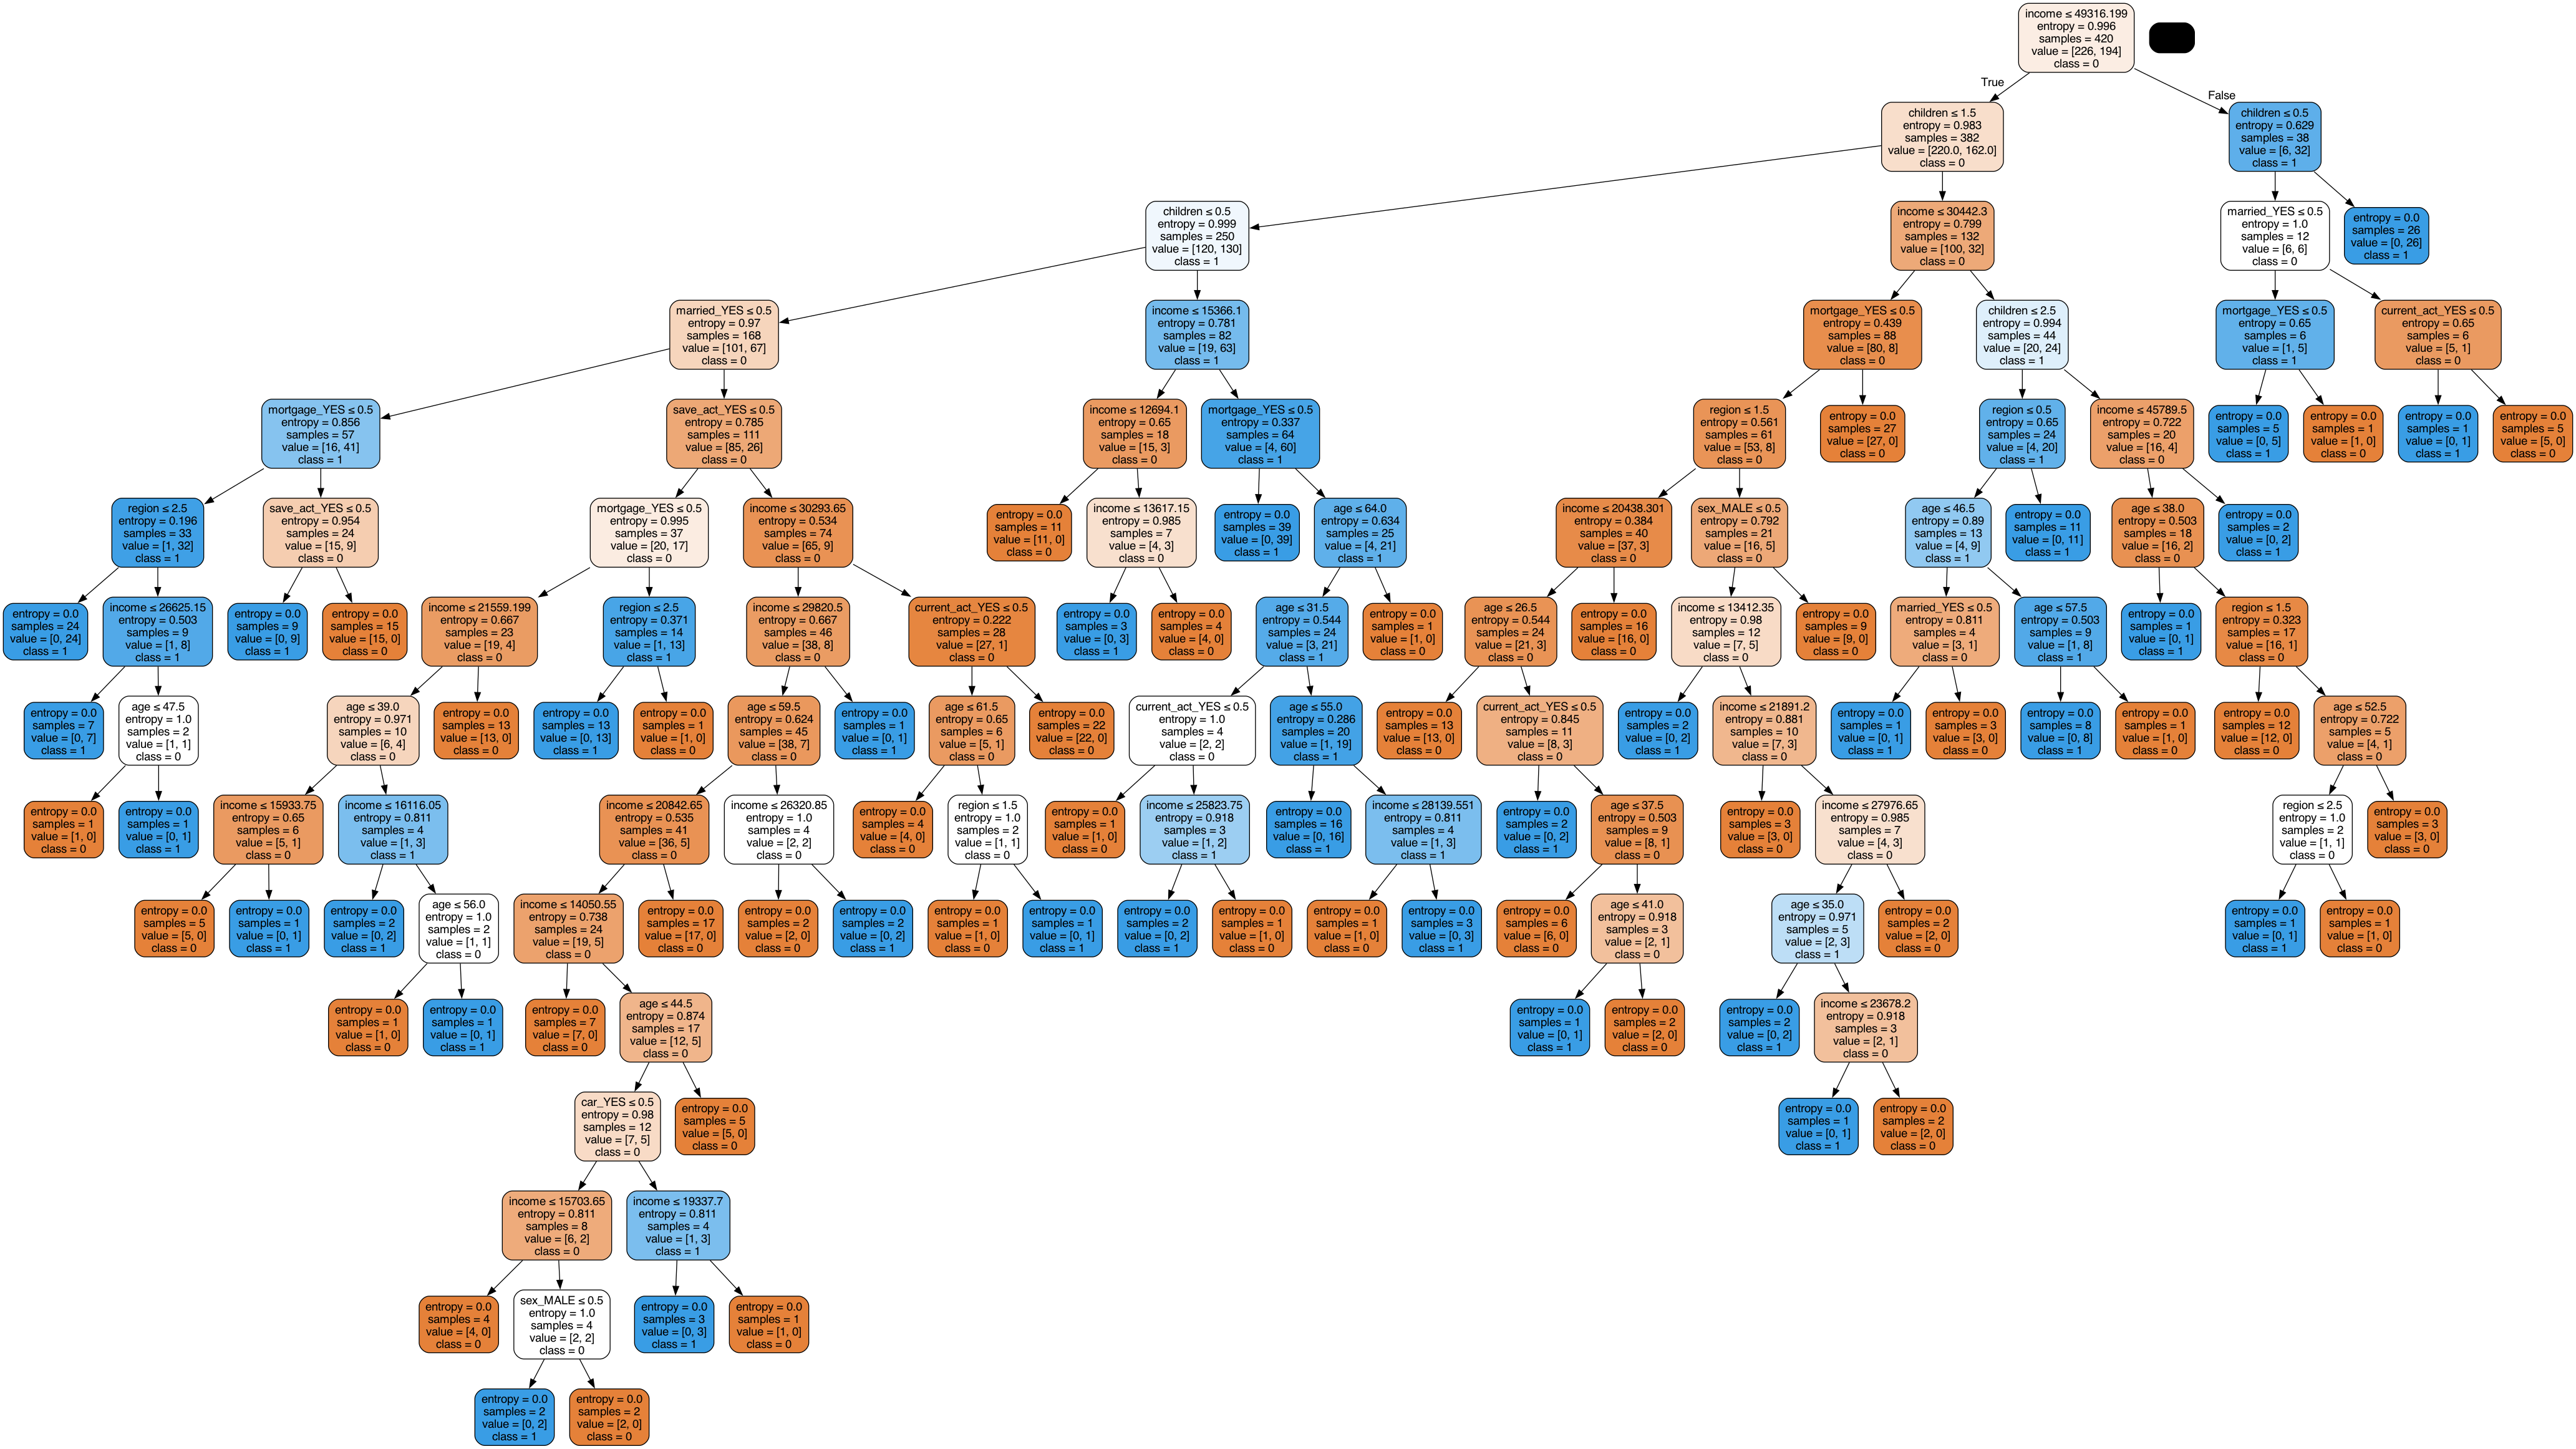

In [71]:
# Visualizing the decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bank-tree.png')
Image(graph.create_png())

## Optimizing the Tree by tuning the max depth of the tree

Text(0.5, 1.0, 'Accuracy vs. Max Depth')

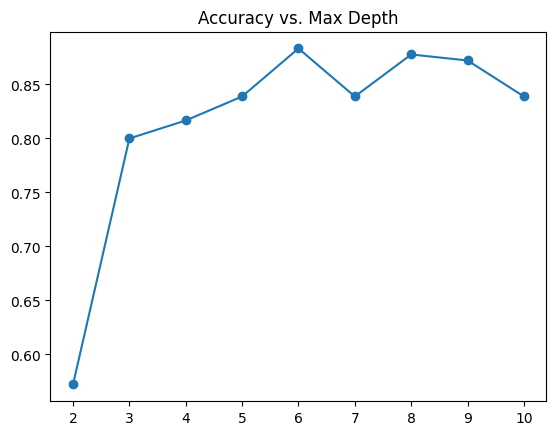

In [72]:
import matplotlib.pyplot as plt
# As you can see, the decision tree model's accuracy was low, to optimize the model we can use hyperparameter tuning
# This time we will use the hyperparameters max_depth to optimize the model.
# This process is also known as pre-pruning the decision tree
max_depth_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy_values = []
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

plt.plot(max_depth_values, accuracy_values, marker='o')
plt.title('Accuracy vs. Max Depth')

In [73]:
# As you can see, the decision tree model's accuracy was low, to optimize the model we can use hyperparameter tuning
# This time we will use the hyperparameters max_depth to optimize the model.
# This process is also known as pre-pruning the decision tree

# Create Decision Tree classifer object (with max_depth=6 to optimize the model according to the graph)
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision, how consistent is the classifier?
print("Precision:",metrics.precision_score(y_test, y_pred))


Accuracy: 0.8833333333333333
Precision: 0.8734177215189873


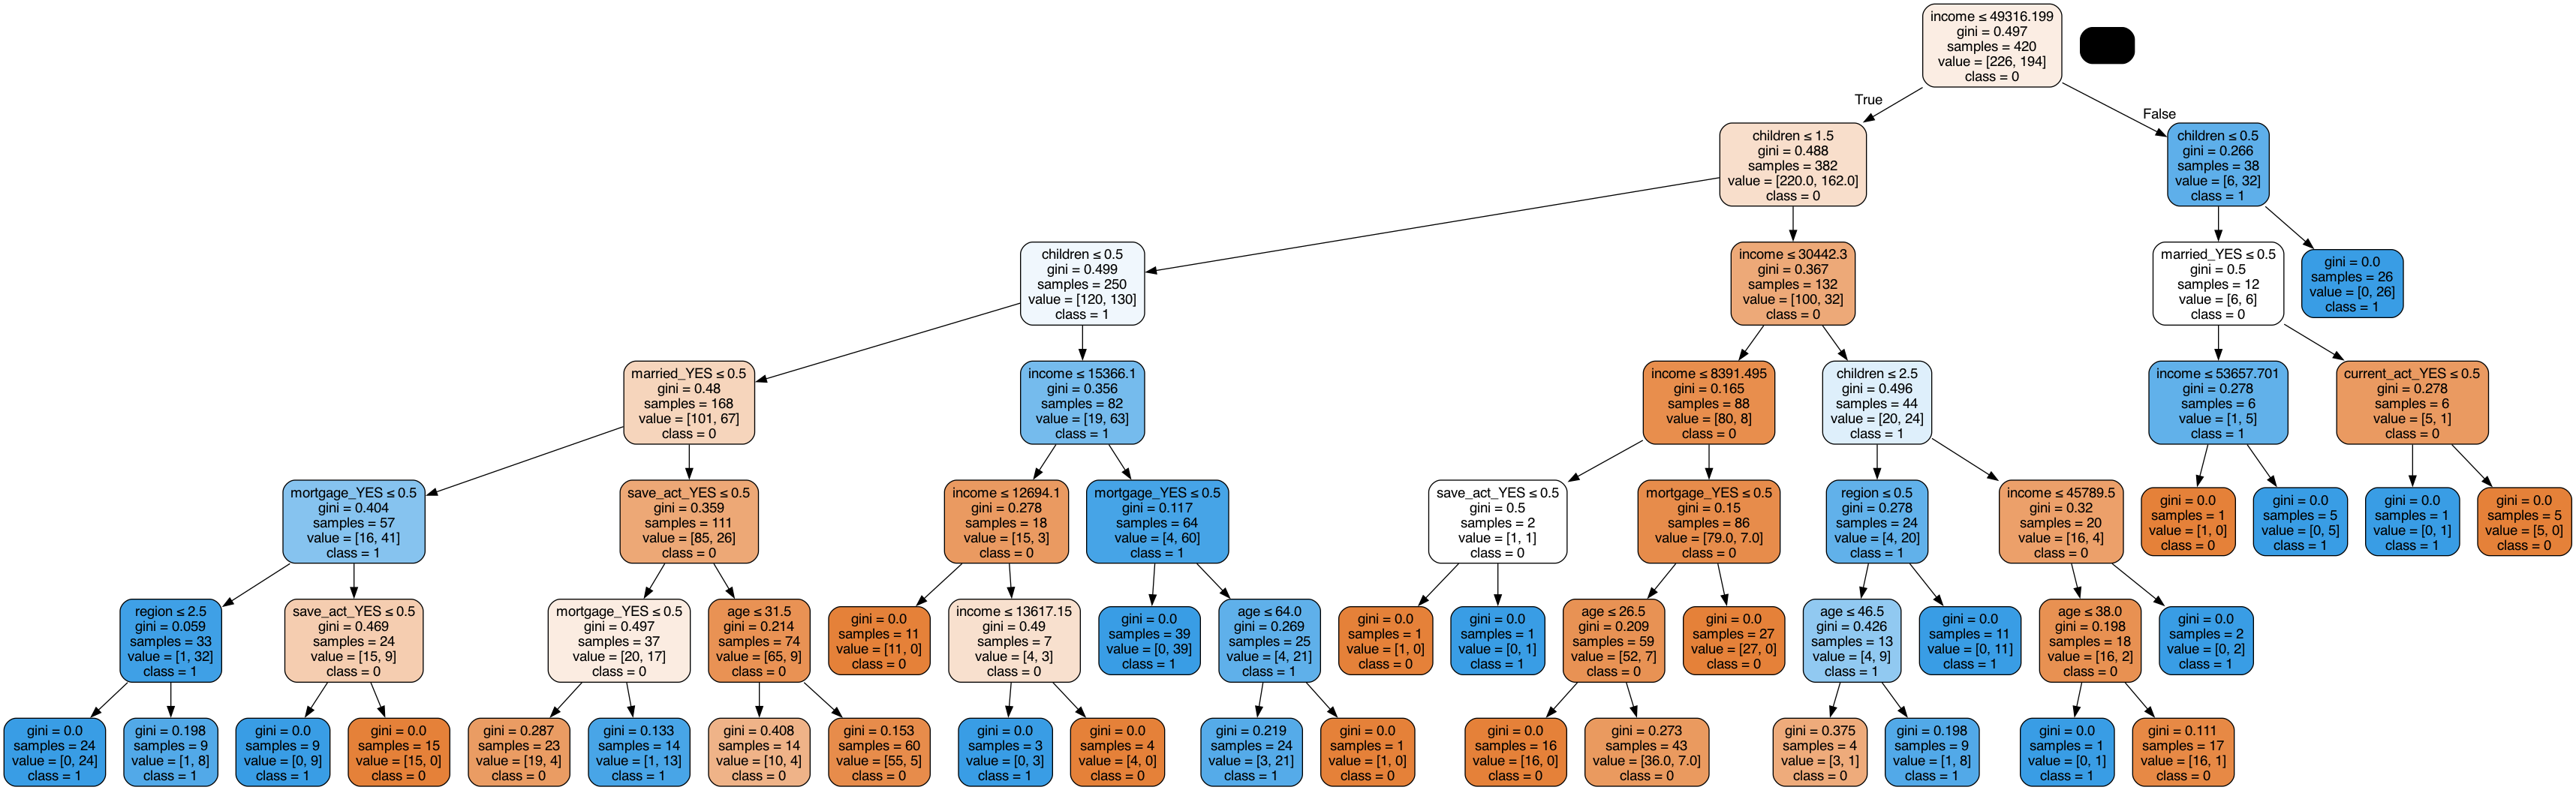

In [74]:
from io import StringIO
import pydotplus
# Visualizing the optimized decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bank-tree.png')
Image(graph.create_png())

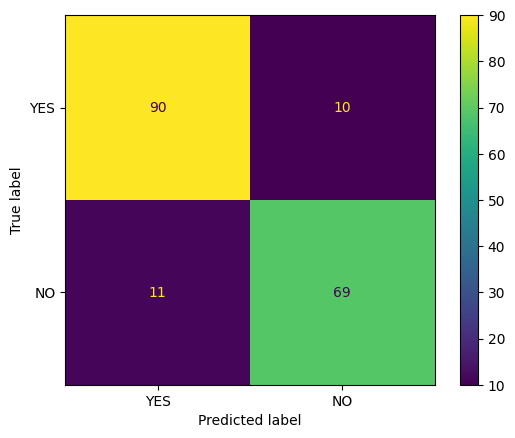

In [75]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
visualized_cm = ConfusionMatrixDisplay(cm, display_labels=["YES", "NO"]).plot()
# Note: The top left are the True Positives,
# The top right are the False Positives,
# The bottom left are the False Negatives,
# The bottom right are the True Negatives.

## Decision Tree Notes

### Decision Tree Pros
- Decision trees are easy to interpret and visualize.
- It can easily capture Non-linear patterns.
- It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
- It can be used for feature engineering such as predicting missing values, suitable for variable selection.
- The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm.

### Decision Tree Cons
- Sensitive to noisy data. It can overfit noisy data.
- The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
- Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

Source: datacamp.com

### What I have learned:
- The Decision Tree model performed the best out of the four algorithms which was expected since our dataset contains features that was mostly categorical values (discrete values) which can contributes to many non-linear relationship.
- As stated above, Decision trees are one of the best at detect non-linear patterns. Even without tuning the hyperparameters, the accuracy exceeds all other algorithms.